In [1]:
# Importing the necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Setting the common URL and page settings for scrapping
base_url = f"https://www.airlinequality.com/airline-reviews/ryanair/"
pages = 22
page_size = 100

# Setting the columns for the dataframe
reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
ryanair_df = pd.DataFrame()

# Create a loop for scrapping through the pages
for i in range(1, pages + 1):
    
    rating = []
    category = []
    
    print(f"Scraping page {i}")
    
    url = f"{base_url}/page{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    response = requests.get(url)
    
        # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for parse in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(parse.get_text())

    for parse2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for parse3 in parse2.find_all('td',{'class' : 'review-value'}):
            rating.append(parse3.get_text())
        recommend = rating[-1]
        rating = rating[:-1]

        for parse4 in parse2.find_all('td',{'class' : 'review-rating-stars stars'}):
            parse5 = len(parse4.find_all('span', {'class' : 'star fill'}))
            rating.append(parse5)
        rating.append(recommend)

        for parse6 in parse2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(parse6.get_text())

        # Build the dataframe from the dictionary
        data_dict = pd.DataFrame([rating], columns=category)
        ryanair_df = pd.concat([ryanair_df, pd.DataFrame(data_dict, index=[0])], ignore_index=True)
        
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

ryanair_df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews


In [3]:
ryanair_df.to_csv("Airline_reviews_data.csv")
ryanair_df.head(10)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,reviews
0,Solo Leisure,Economy Class,Brussels to Podgorica,September 2024,3.0,5.0,4.0,5.0,yes,NaN,NaN,NaN,NaN,✅ Trip Verified | Our flight got at first di...
1,Family Leisure,Economy Class,Cologne to Corfu,September 2024,2.0,5.0,5.0,4.0,yes,Boeing 737-8 MAX,NaN,NaN,NaN,✅ Trip Verified | Cologne to Corfu return. A...
2,Solo Leisure,Economy Class,Dublin to Manchester,September 2024,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN,✅ Trip Verified | I paid for their upgrade b...
3,Solo Leisure,Economy Class,Eindhoven to London Stansted,September 2024,2.0,3.0,3.0,3.0,yes,Boeing 737 Max,3.0,NaN,NaN,✅ Trip Verified | I shall begin by stating t...
4,Family Leisure,Economy Class,Malta to England,September 2024,2.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN,Not Verified | Absolutely useless 4 baggage ha...
5,Solo Leisure,Economy Class,Berlin to Manchester,August 2024,1.0,1.0,1.0,1.0,no,Boeing 737 max 8,1.0,NaN,NaN,Not Verified | I had the worst experience wit...
6,Solo Leisure,Economy Class,Luton to Cork,August 2024,3.0,3.0,4.0,3.0,yes,Boeing 737,2.0,NaN,NaN,✅ Trip Verified | There are lots of positive...
7,Solo Leisure,Economy Class,Cork to Luton,August 2024,3.0,4.0,1.0,3.0,yes,Boeing 737,2.0,NaN,NaN,✅ Trip Verified | Check-in at Cork Airport w...
8,Family Leisure,Economy Class,Palma to Poznań,August 2024,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN,✅ Trip Verified | Worst airline I’ve ever used...
9,Couple Leisure,Economy Class,Luton to Kerry,July 2024,3.0,3.0,3.0,3.0,yes,Boeing 737,NaN,NaN,NaN,✅ Trip Verified | My first time flying Ryanair...


In [4]:
ryanair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type Of Traveller       1679 non-null   object 
 1   Seat Type               2200 non-null   object 
 2   Route                   1678 non-null   object 
 3   Date Flown              1675 non-null   object 
 4   Seat Comfort            2084 non-null   float64
 5   Cabin Staff Service     2074 non-null   float64
 6   Ground Service          1622 non-null   float64
 7   Value For Money         2199 non-null   float64
 8   Recommended             2200 non-null   object 
 9   Aircraft                567 non-null    object 
 10  Food & Beverages        1235 non-null   float64
 11  Inflight Entertainment  341 non-null    float64
 12  Wifi & Connectivity     275 non-null    float64
 13  reviews                 2200 non-null   object 
dtypes: float64(7), object(7)
memory usage: 2

In [5]:
# Now going to scrape the seat review data for Ryanair
base_url = f"https://www.airlinequality.com/seat-reviews/ryanair/"
pages = 22
page_size = 100

# Setting the columns for the dataframe
reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
ryanair_df = pd.DataFrame()

# Create a loop for scrapping through the pages
for i in range(1, pages + 1):
    
    rating = []
    category = []
    
    print(f"Scraping page {i}")
    
    url = f"{base_url}/page{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    response = requests.get(url)
    
        # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for parse in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(parse.get_text())

    for parse2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for parse3 in parse2.find_all('td',{'class' : 'review-value'}):
            rating.append(parse3.get_text())
        recommend = rating[-1]
        rating = rating[:-1]

        for parse4 in parse2.find_all('td',{'class' : 'review-rating-stars stars'}):
            parse5 = len(parse4.find_all('span', {'class' : 'star fill'}))
            rating.append(parse5)
        rating.append(recommend)

        for parse6 in parse2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(parse6.get_text())

        # Build the dataframe from the dictionary
        data_dict = pd.DataFrame([rating], columns=category)
        ryanair_df = pd.concat([ryanair_df, pd.DataFrame(data_dict, index=[0])], ignore_index=True)
        
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

ryanair_df["reviews"] = reviews

Scraping page 1
   ---> 30 total reviews
Scraping page 2
   ---> 30 total reviews
Scraping page 3
   ---> 30 total reviews
Scraping page 4
   ---> 30 total reviews
Scraping page 5
   ---> 30 total reviews
Scraping page 6
   ---> 30 total reviews
Scraping page 7
   ---> 30 total reviews
Scraping page 8
   ---> 30 total reviews
Scraping page 9
   ---> 30 total reviews
Scraping page 10
   ---> 30 total reviews
Scraping page 11
   ---> 30 total reviews
Scraping page 12
   ---> 30 total reviews
Scraping page 13
   ---> 30 total reviews
Scraping page 14
   ---> 30 total reviews
Scraping page 15
   ---> 30 total reviews
Scraping page 16
   ---> 30 total reviews
Scraping page 17
   ---> 30 total reviews
Scraping page 18
   ---> 30 total reviews
Scraping page 19
   ---> 30 total reviews
Scraping page 20
   ---> 30 total reviews
Scraping page 21
   ---> 30 total reviews
Scraping page 22
   ---> 30 total reviews


In [6]:
ryanair_df.to_csv("Airline_seat_reviews_data.csv")
ryanair_df.head(10)

,Seat Type,Aircraft Type,Seat Layout,Date Flown,Type Of Traveller,Seat Legroom,Seat Recline,Seat Width,Aisle Space,Seat Storage,Recommended,Viewing Tv Screen,Power Supply,reviews
0,Economy Class,Boeing 737-8AS,3x3,April 2023,Solo Leisure,5,1,3,5,4.0,yes,NaN,NaN,✅ Trip Verified | Seat 12F. This was a great ...
1,Economy Class,Boeing 737-8AS,3x3,May 2023,Solo Leisure,5,1,4,5,5.0,yes,NaN,NaN,✅ Trip Verified | Seat 26A. This was a random...
2,Economy Class,Boeing 737-800,3x3,February 2023,Couple Leisure,1,1,1,1,1.0,no,NaN,NaN,Not Verified | Booked extra legroom seats for...
3,Economy Class,Boeing 737-800,3x3,November 2021,Family Leisure,4,1,4,3,2.0,yes,NaN,NaN,"Not Verified | The seat was unusually thin, t..."
4,Economy Class,Boeing 737-800,3x3,March 2022,Couple Leisure,1,1,1,1,1.0,no,1.0,1.0,"✅ Trip Verified | The seat is bolt upright, w..."
5,Economy Class,Boeing 737-800,3x3,August 2021,Family Leisure,3,5,3,5,4.0,yes,NaN,NaN,✅ Trip Verified | Small legroom like most Eur...
6,Economy Class,Boeing 737-800,3x3,November 2019,Solo Leisure,3,1,2,2,1.0,yes,NaN,NaN,✅ Trip Verified | \r\nReview of the older Rya...
7,Economy Class,Boeing 737-800,3x3,November 2019,Business,1,1,1,1,1.0,no,NaN,NaN,✅ Trip Verified | Seats are very uncomfortabl...
8,Economy Class,Boeing 737,3x3,October 2019,Couple Leisure,2,1,1,3,1.0,no,NaN,NaN,Not Verified | Ryanair is renowned for cheap ...
9,Economy Class,Boeing 737-800,3x3,May 2019,Solo Leisure,4,2,3,5,2.0,yes,NaN,NaN,✅ Trip Verified | Seat 17D in the emergency e...


In [7]:
ryanair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Seat Type          30 non-null     object 
 1   Aircraft Type      30 non-null     object 
 2   Seat Layout        30 non-null     object 
 3   Date Flown         28 non-null     object 
 4   Type Of Traveller  28 non-null     object 
 5   Seat Legroom       30 non-null     int64  
 6   Seat Recline       30 non-null     int64  
 7   Seat Width         30 non-null     int64  
 8   Aisle Space        30 non-null     int64  
 9   Seat Storage       28 non-null     float64
 10  Recommended        30 non-null     object 
 11  Viewing Tv Screen  3 non-null      float64
 12  Power Supply       1 non-null      float64
 13  reviews            30 non-null     object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.4+ KB


In [8]:
data = pd.read_csv("Airline_reviews_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2200 non-null   int64  
 1   Type Of Traveller       1679 non-null   object 
 2   Seat Type               2200 non-null   object 
 3   Route                   1678 non-null   object 
 4   Date Flown              1675 non-null   object 
 5   Seat Comfort            2084 non-null   float64
 6   Cabin Staff Service     2074 non-null   float64
 7   Ground Service          1622 non-null   float64
 8   Value For Money         2199 non-null   float64
 9   Recommended             2200 non-null   object 
 10  Aircraft                566 non-null    object 
 11  Food & Beverages        1235 non-null   float64
 12  Inflight Entertainment  341 non-null    float64
 13  Wifi & Connectivity     275 non-null    float64
 14  reviews                 2200 non-null   

In [9]:
data.isna().sum()

Unnamed: 0                   0
Type Of Traveller          521
Seat Type                    0
Route                      522
Date Flown                 525
Seat Comfort               116
Cabin Staff Service        126
Ground Service             578
Value For Money              1
Recommended                  0
Aircraft                  1634
Food & Beverages           965
Inflight Entertainment    1859
Wifi & Connectivity       1925
reviews                      0
dtype: int64

In [10]:
seat_data = pd.read_csv('Airline_seat_reviews_data.csv')
ryanair_data = pd.merge(data, seat_data, on='Seat Type', how='inner')
ryanair_data.head()

,Unnamed: 0_x,Type Of Traveller_x,Seat Type,Route,Date Flown_x,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended_x,...,Type Of Traveller_y,Seat Legroom,Seat Recline,Seat Width,Aisle Space,Seat Storage,Recommended_y,Viewing Tv Screen,Power Supply,reviews_y
0,0,Solo Leisure,Economy Class,Brussels to Podgorica,September 2024,3.0,5.0,4.0,5.0,yes,...,Solo Leisure,5,1,3,5,4.0,yes,NaN,NaN,✅ Trip Verified | Seat 12F. This was a great ...
1,0,Solo Leisure,Economy Class,Brussels to Podgorica,September 2024,3.0,5.0,4.0,5.0,yes,...,Solo Leisure,5,1,4,5,5.0,yes,NaN,NaN,✅ Trip Verified | Seat 26A. This was a random...
2,0,Solo Leisure,Economy Class,Brussels to Podgorica,September 2024,3.0,5.0,4.0,5.0,yes,...,Couple Leisure,1,1,1,1,1.0,no,NaN,NaN,Not Verified | Booked extra legroom seats for...
3,0,Solo Leisure,Economy Class,Brussels to Podgorica,September 2024,3.0,5.0,4.0,5.0,yes,...,Family Leisure,4,1,4,3,2.0,yes,NaN,NaN,"Not Verified | The seat was unusually thin, t..."
4,0,Solo Leisure,Economy Class,Brussels to Podgorica,September 2024,3.0,5.0,4.0,5.0,yes,...,Couple Leisure,1,1,1,1,1.0,no,1.0,1.0,"✅ Trip Verified | The seat is bolt upright, w..."


In [11]:
ryanair_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65400 entries, 0 to 65399
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0_x            65400 non-null  int64  
 1   Type Of Traveller_x     49800 non-null  object 
 2   Seat Type               65400 non-null  object 
 3   Route                   49770 non-null  object 
 4   Date Flown_x            49680 non-null  object 
 5   Seat Comfort            61920 non-null  float64
 6   Cabin Staff Service     61620 non-null  float64
 7   Ground Service          48090 non-null  float64
 8   Value For Money         65370 non-null  float64
 9   Recommended_x           65400 non-null  object 
 10  Aircraft                16800 non-null  object 
 11  Food & Beverages        36810 non-null  float64
 12  Inflight Entertainment  9960 non-null   float64
 13  Wifi & Connectivity     8100 non-null   float64
 14  reviews_x               65400 non-null

In [12]:
# Need to merge and rename duplicate columns
columns_to_merge = ['Type Of Traveller', 'Date Flown', 'Recommended', 'reviews', 'Unnamed: 0']

for col in columns_to_merge:
    ryanair_data[col] = ryanair_data[f'{col}_x'].fillna(ryanair_data[f'{col}_y'])
    ryanair_data = ryanair_data.drop(columns=[f'{col}_x', f'{col}_y'])

In [13]:
ryanair_data['Type Of Traveller'].value_counts()

Couple Leisure    23480
Solo Leisure      22860
Family Leisure    13720
Business           4300
Name: Type Of Traveller, dtype: int64

In [14]:
# Importing re for text manipulation
import re
# Defining the function
def clean(text):
    if isinstance(text, str):  # Only apply cleaning if the input is a string
        # Pattern to match most emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # Emoticons
                                   u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                                   u"\U00002700-\U000027BF"  # Dingbats (includes the ✅ tick)
                                   u"\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
                                   "]+", flags=re.UNICODE)
    
        text = emoji_pattern.sub(r'', text)  # Remove emojis
        text = re.sub('[^A-Za-z]+', ' ', str(text))  # Replace other non-alphabet characters
        return text.strip()  # Remove leading/trailing spaces
    else:
        return text  # If it's not a string, return as-is

In [15]:
ryanair_data = ryanair_data.applymap(clean)
ryanair_data.head(10)

,Seat Type,Route,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,...,Seat Width,Aisle Space,Seat Storage,Viewing Tv Screen,Power Supply,Type Of Traveller,Date Flown,Recommended,reviews,Unnamed: 0
0,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,3,5,4.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
1,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,4,5,5.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
2,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,1,1.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
3,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,4,3,2.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
4,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,1,1.0,1.0,1.0,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
5,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,3,5,4.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
6,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,2,2,1.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
7,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,1,1.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
8,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,3,1.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0
9,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,3,5,2.0,NaN,NaN,Solo Leisure,September,yes,Trip Verified Our flight got at first diverted...,0


In [16]:
# Only using the Trip Verified reviews for analysis
verified_data = ryanair_data[ryanair_data['reviews'].str.contains('Trip Verified')]
# Need to remove the Trip Verified text now
verified_data['reviews'] = verified_data['reviews'].str.replace('^Trip Verified ', '', regex=True)
verified_data.reset_index(drop=True, inplace=True)

C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_20836\1465878786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_data['reviews'] = verified_data['reviews'].str.replace('^Trip Verified ', '', regex=True)


In [17]:
verified_data

,Seat Type,Route,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,...,Seat Width,Aisle Space,Seat Storage,Viewing Tv Screen,Power Supply,Type Of Traveller,Date Flown,Recommended,reviews,Unnamed: 0
0,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,3,5,4.0,NaN,NaN,Solo Leisure,September,yes,Our flight got at first diverted to Sofia beca...,0
1,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,4,5,5.0,NaN,NaN,Solo Leisure,September,yes,Our flight got at first diverted to Sofia beca...,0
2,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,1,1.0,NaN,NaN,Solo Leisure,September,yes,Our flight got at first diverted to Sofia beca...,0
3,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,4,3,2.0,NaN,NaN,Solo Leisure,September,yes,Our flight got at first diverted to Sofia beca...,0
4,Economy Class,Brussels to Podgorica,3.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,...,1,1,1.0,1.0,1.0,Solo Leisure,September,yes,Our flight got at first diverted to Sofia beca...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26545,Economy Class,London Stansted to Barcelona,1.0,3.0,1.0,2.0,A,1.0,1.0,1.0,...,1,1,1.0,NaN,NaN,Couple Leisure,November,no,London Stansted to Barcelona I fly Ryanair reg...,1143
26546,Economy Class,London Stansted to Barcelona,1.0,3.0,1.0,2.0,A,1.0,1.0,1.0,...,4,5,5.0,NaN,NaN,Couple Leisure,November,no,London Stansted to Barcelona I fly Ryanair reg...,1143
26547,Economy Class,London Stansted to Barcelona,1.0,3.0,1.0,2.0,A,1.0,1.0,1.0,...,3,5,3.0,NaN,NaN,Couple Leisure,November,no,London Stansted to Barcelona I fly Ryanair reg...,1143
26548,Economy Class,London Stansted to Barcelona,1.0,3.0,1.0,2.0,A,1.0,1.0,1.0,...,5,1,NaN,1.0,NaN,Couple Leisure,November,no,London Stansted to Barcelona I fly Ryanair reg...,1143


In [18]:
verified_reviews_data = verified_data[['Unnamed: 0', 'reviews']]
verified_reviews_data

,Unnamed: 0,reviews
0,0,Our flight got at first diverted to Sofia beca...
1,0,Our flight got at first diverted to Sofia beca...
2,0,Our flight got at first diverted to Sofia beca...
3,0,Our flight got at first diverted to Sofia beca...
4,0,Our flight got at first diverted to Sofia beca...
...,...,...
26545,1143,London Stansted to Barcelona I fly Ryanair reg...
26546,1143,London Stansted to Barcelona I fly Ryanair reg...
26547,1143,London Stansted to Barcelona I fly Ryanair reg...
26548,1143,London Stansted to Barcelona I fly Ryanair reg...


In [19]:
verified_reviews_data.drop_duplicates(inplace=True)
verified_reviews_data.reset_index(drop=True, inplace=True)
verified_reviews_data

C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_20836\3996059745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_reviews_data.drop_duplicates(inplace=True)


,Unnamed: 0,reviews
0,0,Our flight got at first diverted to Sofia beca...
1,1,Cologne to Corfu return As usually in my exper...
2,2,I paid for their upgrade baggage allowance and...
3,3,I shall begin by stating that I am impressed w...
4,6,There are lots of positives to write about for...
...,...,...
880,1139,Stansted to Limoges Possibly the worst airline...
881,1140,Ryanair from Gatwick to Dublin Had problems wi...
882,1141,I had a flight booked from Stansted to Dublin ...
883,1142,Rome to Tel Aviv We were seated separately and...


In [20]:
# Beginning the sentiment text classication to positive, negative and neutral categories
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
scores = [analyser.polarity_scores(x) for x in verified_reviews_data['reviews']]
scores

[{'neg': 0.112, 'neu': 0.831, 'pos': 0.057, 'compound': -0.5647},
 {'neg': 0.023, 'neu': 0.891, 'pos': 0.086, 'compound': 0.761},
 {'neg': 0.085, 'neu': 0.869, 'pos': 0.046, 'compound': -0.2263},
 {'neg': 0.053, 'neu': 0.838, 'pos': 0.108, 'compound': 0.7538},
 {'neg': 0.078, 'neu': 0.768, 'pos': 0.154, 'compound': 0.9455},
 {'neg': 0.054, 'neu': 0.784, 'pos': 0.162, 'compound': 0.9842},
 {'neg': 0.289, 'neu': 0.626, 'pos': 0.085, 'compound': -0.879},
 {'neg': 0.056, 'neu': 0.664, 'pos': 0.28, 'compound': 0.9573},
 {'neg': 0.11, 'neu': 0.871, 'pos': 0.019, 'compound': -0.6705},
 {'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'compound': -0.9661},
 {'neg': 0.085, 'neu': 0.886, 'pos': 0.029, 'compound': -0.9497},
 {'neg': 0.097, 'neu': 0.827, 'pos': 0.076, 'compound': -0.2325},
 {'neg': 0.08, 'neu': 0.857, 'pos': 0.062, 'compound': -0.8566},
 {'neg': 0.106, 'neu': 0.883, 'pos': 0.011, 'compound': -0.8682},
 {'neg': 0.069, 'neu': 0.86, 'pos': 0.07, 'compound': 0.3672},
 {'neg': 0.11, 'neu': 0.8

In [22]:
verified_reviews_data['Compound_Score'] = [x['compound'] for x in scores]
verified_reviews_data.head()

C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_20836\1291605697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_reviews_data['Compound_Score'] = [x['compound'] for x in scores]


,Unnamed: 0,reviews,Compound_Score
0,0,Our flight got at first diverted to Sofia beca...,-0.5647
1,1,Cologne to Corfu return As usually in my exper...,0.7610
2,2,I paid for their upgrade baggage allowance and...,-0.2263
3,3,I shall begin by stating that I am impressed w...,0.7538
4,6,There are lots of positives to write about for...,0.9455


In [23]:
verified_reviews_data = verified_reviews_data.drop(['Unnamed: 0'], axis=1)

verified_reviews_data.loc[verified_reviews_data['Compound_Score'] < 0, 'Sentiments'] = 'Negative'
verified_reviews_data.loc[verified_reviews_data['Compound_Score'] == 0, 'Sentiments'] = 'Neutral'
verified_reviews_data.loc[verified_reviews_data['Compound_Score'] > 0, 'Sentiments'] = 'Positive'
verified_reviews_data.head()

,reviews,Compound_Score,Sentiments
0,Our flight got at first diverted to Sofia beca...,-0.5647,Negative
1,Cologne to Corfu return As usually in my exper...,0.7610,Positive
2,I paid for their upgrade baggage allowance and...,-0.2263,Negative
3,I shall begin by stating that I am impressed w...,0.7538,Positive
4,There are lots of positives to write about for...,0.9455,Positive


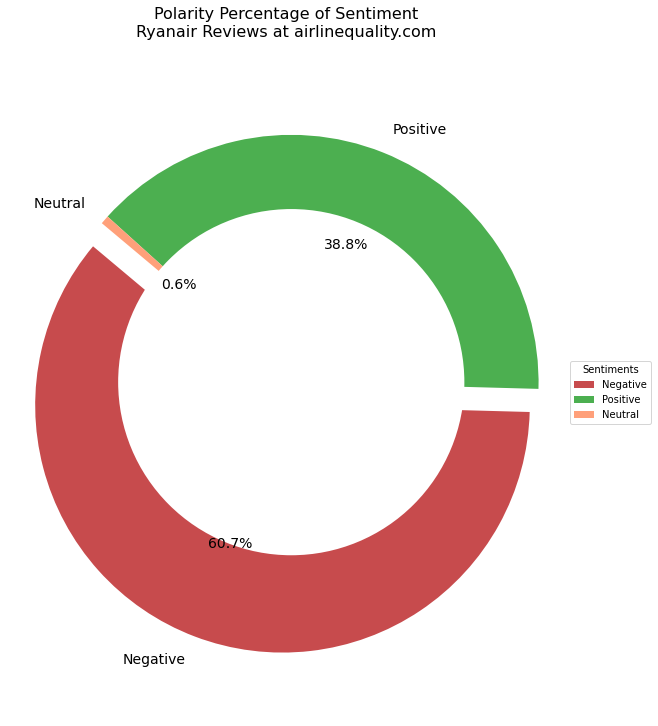

In [24]:
# Visualisation

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12), subplot_kw=dict(aspect="equal"))

sizes = [count for count in verified_reviews_data['Sentiments'].value_counts()]
labels = list(verified_reviews_data['Sentiments'].value_counts().index)
explode = (0.1, 0, 0)

colors = ['#C74B4D', '#4CAF50', '#FFA07A']

# Create a pie chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    explode=explode, 
    textprops={'fontsize': 14},
    startangle=140,
    colors=colors  # Assign legend colors to graph colors
)

# Draw a circle at the centre
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio - pie drawn as circle
ax.axis('equal')  

# Title & Legend
ax.set_title('Polarity Percentage of Sentiment\nRyanair Reviews at airlinequality.com', fontsize=16, pad=30)
ax.legend(wedges, labels, title="Sentiments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

colors = ['#C74B4D', '#4CAF50', '#FFA07A']
for wedge, color in zip(wedges, colors):
    wedge.set_facecolor(color)

# Save the figure
plt.savefig('Polarity_Sentiment.png')
plt.show()

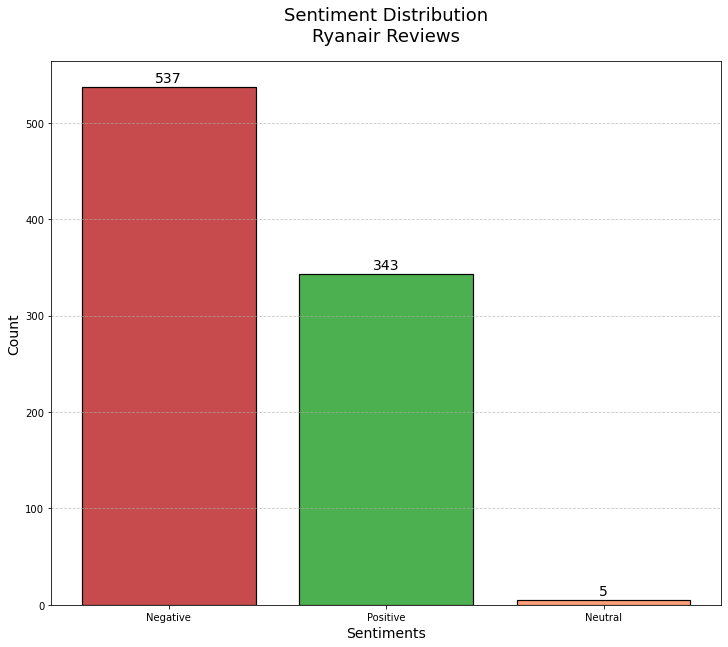

In [25]:
# Count the occurrences of each sentiment
s = pd.value_counts(verified_reviews_data['Sentiments'])

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 10))

colors = ['#C74B4D', '#4CAF50', '#FFA07A']

bars = ax.bar(s.index, s.values, color=colors, edgecolor='black', linewidth=1.2)

# Set the title and labels
ax.set_title('Sentiment Distribution\nRyanair Reviews', fontsize=18, pad=20)
ax.set_xlabel('Sentiments', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Annotate each bar with its height
for bar in bars:
    yval = bar.get_height()
    ax.annotate(f"{yval:,}", 
                xy=(bar.get_x() + bar.get_width() / 2, yval), 
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', 
                fontsize=14)

# Set face color
plt.rcParams['axes.facecolor'] = 'white'

# Show and save the figure
plt.savefig('Sentiment_Bar_Chart.png')
plt.show()

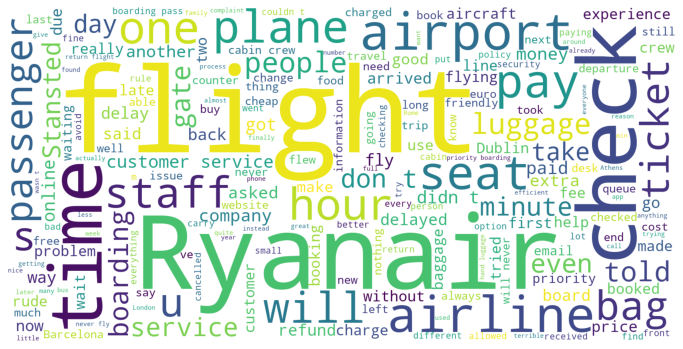

<Figure size 432x288 with 0 Axes>

In [26]:
# Creating a WordCloud
from wordcloud import WordCloud, STOPWORDS

text = " ".join(reviews for reviews in verified_reviews_data['reviews'])
word_cloud = WordCloud(width=1600, height=800,
                       background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('Ryanair_Wordcloud.png')